# Data Preparation

In [ ]:
!pip install gdown
!gdown --id 1my5Xr0NSYaEsgwaDEG9HkaK1LOlNsnFJ

# Unzip the file
!unzip -q dataset2.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1my5Xr0NSYaEsgwaDEG9HkaK1LOlNsnFJ
From (redirected): https://drive.google.com/uc?id=1my5Xr0NSYaEsgwaDEG9HkaK1LOlNsnFJ&confirm=t&uuid=8117c9d5-60c9-4cba-b3c1-98e36436d7fa
To: /content/dataset2.zip
100% 810M/810M [01:47<00:00, 7.51MB/s]


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
TRAINING_DIR = '/content/dataset/TRAIN'
VALIDATION_DIR = '/content/dataset/TEST'

training_datagen = ImageDataGenerator(
    rescale = 1./255
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
)

Found 1490 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [ ]:
motivs = train_generator.class_indices
print(motivs)

{'Batik Betawi': 0, 'Batik Blekok': 1, 'Batik Cendrawasih': 2, 'Batik Geblek Renteng': 3, 'Batik Kawung': 4, 'Batik Lasem': 5, 'Batik Megamendung': 6, 'Batik Parang': 7, 'Batik Poleng': 8, 'Batik Sekar Jagad': 9}


# CNN Model

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Train Model

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("val_accuracy") >= 0.84:
            self.model.stop_training = True

In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

custom_callback = CustomCallback()

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[custom_callback],
    verbose=1
)

Epoch 1/50
47/47 [==============================] - 41s 711ms/step - loss: 2.3199 - accuracy: 0.0906 - val_loss: 2.2941 - val_accuracy: 0.1850
Epoch 2/50
47/47 [==============================] - 23s 487ms/step - loss: 2.3142 - accuracy: 0.1564 - val_loss: 2.0736 - val_accuracy: 0.2500
Epoch 3/50
47/47 [==============================] - 23s 493ms/step - loss: 2.2229 - accuracy: 0.2134 - val_loss: 3.1274 - val_accuracy: 0.1000
Epoch 4/50
47/47 [==============================] - 24s 520ms/step - loss: 2.0493 - accuracy: 0.2691 - val_loss: 1.8312 - val_accuracy: 0.3450
Epoch 5/50
47/47 [==============================] - 22s 480ms/step - loss: 1.8790 - accuracy: 0.3295 - val_loss: 1.9572 - val_accuracy: 0.2850
Epoch 6/50
47/47 [==============================] - 22s 473ms/step - loss: 1.8893 - accuracy: 0.3409 - val_loss: 1.8046 - val_accuracy: 0.3850
Epoch 7/50
47/47 [==============================] - 23s 483ms/step - loss: 1.7683 - accuracy: 0.3631 - val_loss: 1.6707 - val_accuracy: 0.3950

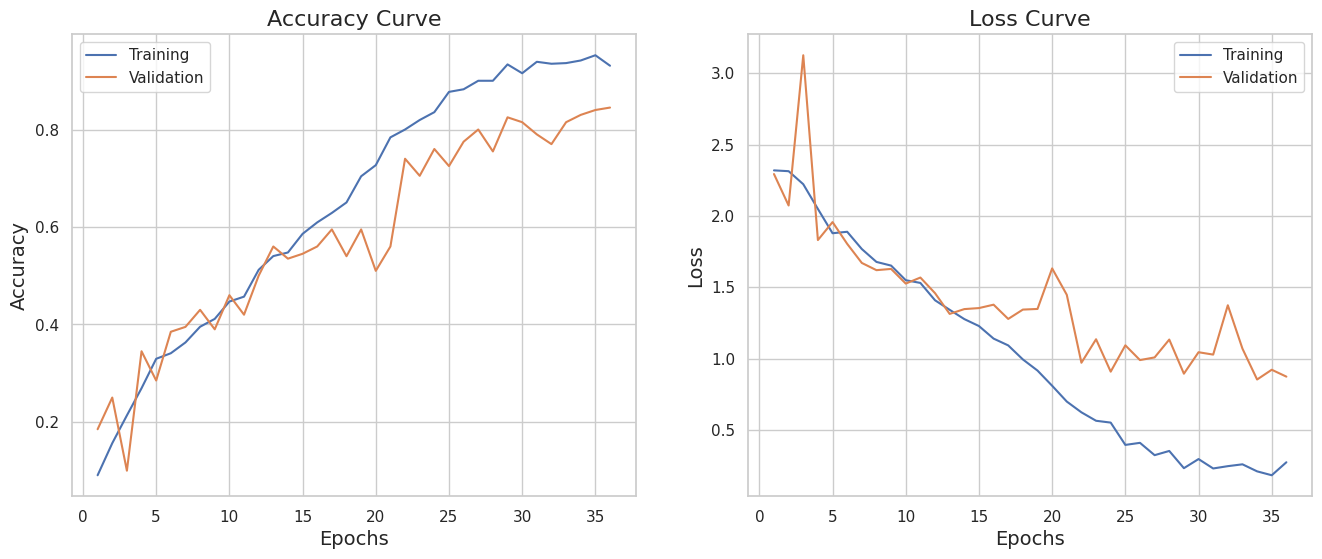

In [ ]:
# Data from history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Grafik Style
sns.set(style='whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grafik Accuration
sns.lineplot(x=epochs, y=train_acc, label='Training', ax=ax1)
sns.lineplot(x=epochs, y=val_acc, label='Validation', ax=ax1)
ax1.set_title('Accuracy Curve', fontsize=16)
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.legend()

# Grafik Loss
sns.lineplot(x=epochs, y=train_loss, label='Training', ax=ax2)
sns.lineplot(x=epochs, y=val_loss, label='Validation', ax=ax2)
ax2.set_title('Loss Curve', fontsize=16)
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Loss', fontsize=14)
ax2.legend()

plt.show()

In [ ]:
import tensorflow as tf
from google.colab import files

model.save('modelCNN_fin.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test Model

In [ ]:
import math
import random

model = load_model('modelCNN_fin.h5')
TEST_DIR = '/content/dataset/TEST'

In [ ]:
for motive in motivs.keys():
    images_list = os.listdir(os.path.join(TEST_DIR, motive))
    correct_count = 0
    total_images = len(images_list)  # Total number of images for the current motive

    for idx, image in enumerate(images_list):
        img_path = f'/content/dataset/TEST/{motive}/{image}'
        img = load_img(img_path, target_size=(150, 150))

        img_array = img_to_array(img) / 255.0
        img_array = tf.expand_dims(img_array, 0)

        motives_list = list(motivs.keys())
        prediction = model.predict(img_array, verbose=0)
        pred_idx = np.argmax(prediction)
        pred_motive = motives_list[pred_idx]

        if pred_motive == motive:
            correct_count += 1

    # Calculate the percentage of correct predictions
    correct_percentage = (correct_count / total_images) * 100

    print(f'{motive} Predictions --> {correct_count}/{total_images} correct ({correct_percentage:.2f}%)')

Batik Betawi Predictions --> 17/20 correct (85.00%)
Batik Blekok Predictions --> 20/20 correct (100.00%)
Batik Cendrawasih Predictions --> 18/20 correct (90.00%)
Batik Geblek Renteng Predictions --> 17/20 correct (85.00%)
Batik Kawung Predictions --> 17/20 correct (85.00%)
Batik Lasem Predictions --> 14/20 correct (70.00%)
Batik Megamendung Predictions --> 18/20 correct (90.00%)
Batik Parang Predictions --> 15/20 correct (75.00%)
Batik Poleng Predictions --> 15/20 correct (75.00%)
Batik Sekar Jagad Predictions --> 18/20 correct (90.00%)


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

# Upload the image
uploaded = files.upload()

# Assuming 'model' is your trained model and you have already defined it

# Load and preprocess the image
for fn in uploaded.keys():
    # Load the image with target size as required by your model (150x150)
    img_path = fn
    img = image.load_img(img_path, target_size=(150, 150))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the shape required by the model
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image data (same as the rescaling done during training)
    img_array /= 255.0

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class = np.argmax(predictions, axis=1)

    # Optionally, map the class index to the actual class label
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]

    print(f'Predicted class: {predicted_label} with probability {np.max(predictions)}')


Saving 2024-06-10 (2).png to 2024-06-10 (2).png
Saving 633527-batik-motif-mega-mendung-cirebon.jpeg to 633527-batik-motif-mega-mendung-cirebon.jpeg
1/1 [==============================] - 0s 18ms/step
Predicted class: Batik Megamendung with probability 0.8609693050384521
1/1 [==============================] - 0s 16ms/step
Predicted class: Batik Megamendung with probability 0.9594322443008423
